In [1]:
import sys 
import pathlib
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from scipy.integrate import cumtrapz

import pickle
np.set_printoptions(linewidth=100)
import scipy

In [2]:
Silicon = {
    'name':'Silicon',
    'Z':14.00,
    'A':28.08,
    'density': 2.33,
    'excitation_energy': 173.0e-9,
    'radiation_length' : 1,
    'nuclear_radius': 0.441,
    'nuclear_elastic_slope': 120.14,
    'cross_section': [0.664, 0.430, 0, 0, 0, 0.0390e-2],
    'crystal_radiation_length' : 0.0937,
    'crystal_nuclear_length': 0.4652,
    'crystal_plane_distance' : 0.96e-7,
    'crystal_potential': 21.34,
    'nuclear_collision_length': 0.3016
    }


Text(0, 0.5, 'y')

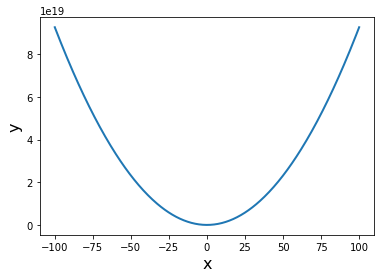

In [3]:
def x_c(eta, dp = Silicon['crystal_plane_distance']):
    return np.sqrt(eta) * (dp/2)

def beta(p0c, m=938.2e6):
    return p0c/m

def U(x, eta, U0, beta, p0c, R):
    xc = x_c(eta)
    return eta * U0*(x/xc)**2 + beta*p0c/R *x

R = 80
p0c = 450e9
U0 = Silicon['crystal_potential']
eta = 0.9

beta = beta(p0c)

fig, ax = plt.subplots()
x = np.linspace(-100, 100, 400)
y = U(x, eta, U0, beta, p0c, R)

ax.plot(x, y, linewidth = 2)
#ax.set_ylim(-7, 15)
#ax.set_xlim(-4,4)
#ax.axvline(0, linewidth = 1)
#ax.axhline(0, linewidth = 1)
ax.set_xlabel(r'x', fontsize = 16)
ax.set_ylabel(r'y',  fontsize = 16)

#ax.set_xticks(range(int(ax.get_xlim()[0]), int(ax.get_xlim()[1])))
#ax.set_yticks(range(int(ax.get_ylim()[0])+1, int(ax.get_ylim()[1]), 2))
#ax.yticks(range(int(min(y)), int(max(y)) + 1, 3))
#ax.tick_params(axis='x', labelsize=14) 
#ax.tick_params(axis='y', labelsize=14) 
#ax.grid(linestyle = "--")

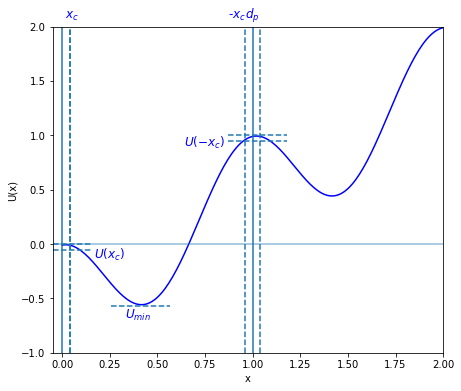

In [5]:
def repeating_parabola(x, A=1, k=1):
    return A * np.cos(k * x)**2
# Define the function with increasing vertical offset after each repetition
def increasing_vertical_offset_parabola(x, A=1, n=2, B=0.5, C=0):
    return A * np.cos(2*np.pi*n * x+0.1)**2 + B * x - C

# Generate x values
x = np.linspace(0, 10, 1000)  # Range of x from 0 to 10
#y = repeating_parabola(x, A=1, k=1)  # Use amplitude A=1 and frequency k=2 for repetitions
y = increasing_vertical_offset_parabola(x, A=1, n=0.5, B=1, C=1)  # Use amplitude A=1, frequency k=2, and offset B=0.5

xc =0.04

# Create the plot
plt.figure(figsize=(7, 6))
plt.plot(x, y, color='b')
plt.xlim(-0.05,2)
plt.ylim(-1,2)
plt.xlabel('x')
plt.ylabel('U(x)')

plt.axvline(1, linestyle = '-')
plt.axvline(0, linestyle = '-')
plt.axvline(1 - xc, linestyle = '--')
plt.axvline(1 + xc, linestyle = '--')
plt.axvline(0 + xc, linestyle = '--')
plt.axvline(0 + xc, linestyle = '--')

plt.axhline(1, linestyle = '--', xmin =0.45,  xmax = 0.6)
plt.axhline(1-0.05, linestyle = '--',  xmin =0.45,  xmax = 0.6)
plt.axhline(-0.57, linestyle = '--' , xmin = 0.15, xmax = 0.3)
plt.axhline(0-0.05, linestyle = '--',  xmax = 0.1 )
plt.axhline(0, linestyle = '--',  xmax = 0.1)
plt.axhline(0, linestyle = '-',   alpha = 0.5)
plt.text(0.4, -0.65, r'$U_{min}$', fontsize=12, color='blue', ha='center', va='center')
plt.text(1-0.08, 2.1, r'-$x_c$', fontsize=12, color='blue', ha='center', va='center')
plt.text(0.05, 2.1, r'$x_c$', fontsize=12, color='blue', ha='center', va='center')
plt.text(1.0, 2.1, r'$d_p$', fontsize=12, color='blue', ha='center', va='center')
plt.text(0.25, -0.1, r'$U(x_c)$', fontsize=12, color='blue', ha='center', va='center')
plt.text(1-0.25, 1-0.07, r'$U(-x_c)$', fontsize=12, color='blue', ha='center', va='center')

#plt.axvline(1.5, ymin = 0.15, ymax= 0.65, linestyle = '-', alpha =0.8, )

plt.savefig('./Plots/Potential.png')
#plt.grid(True)

plt.show()